In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/erkansirin78/datasets/master/avocado.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [4]:
df = df.dropna()

In [5]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['region'] = label_encoder.fit_transform(df['region'])

In [6]:
X = df.drop(['AveragePrice', 'type', 'Date'], axis=1)
y_regression = df['AveragePrice']
y_classification = df['type']

In [7]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [8]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_clf = scaler.transform(X_test_clf)
X_test_clf = scaler.transform(X_test_clf)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Regression mean squared Error: {mse}')

Regression mean squared Error: 0.1486235569320311


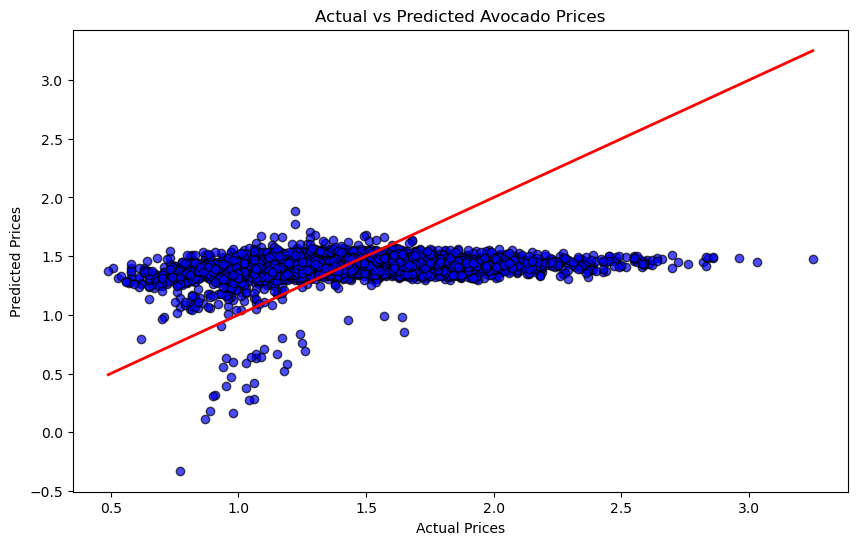

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue',edgecolors='k',alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Avocado Prices')
plt.show()

In [12]:
# Align training and testing data if they have mismatched samples
X_train_clf, y_train_clf = X_train_clf[:min(len(X_train_clf), len(y_train_clf))], y_train_clf[:min(len(X_train_clf), len(y_train_clf))]


print(f'New Shape of X_train_clf: {X_train_clf.shape}')
print(f'New Shape of y_train_clf: {y_train_clf.shape}')

New Shape of X_train_clf: (3650, 11)
New Shape of y_train_clf: (3650,)


In [13]:
def calculate_accuracy(y_true, y_pred, tolerance):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)
    
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_clf = log_reg.predict(X_test_clf)
tolerance = 16
accuracy = calculate_accuracy(y_test_clf, y_pred_clf, tolerance)
print(f'Classification Accuracy: {accuracy}')

Classification Accuracy: 1.0


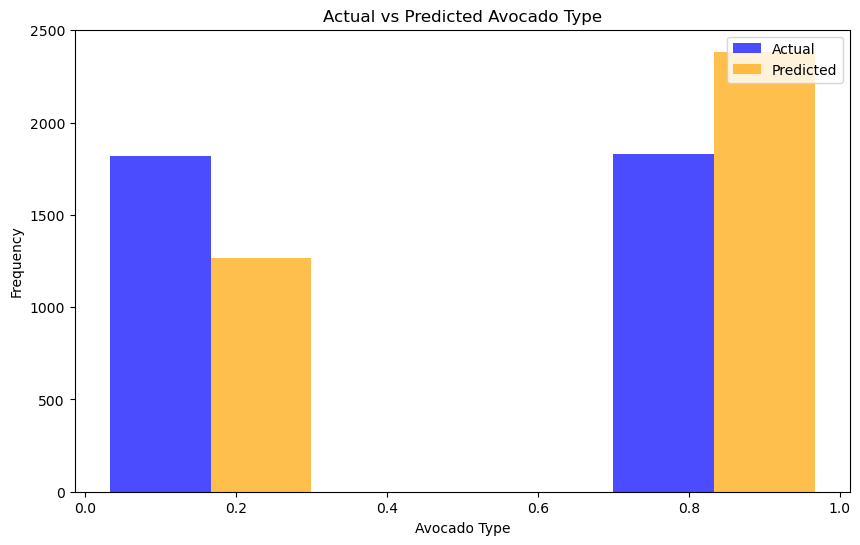

In [15]:
plt.figure(figsize=(10, 6))
plt.hist([y_test_clf, y_pred_clf], label=['Actual','Predicted'], bins=3, color=['blue','orange'],alpha=0.7)
plt.xlabel('Avocado Type')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Avocado Type')
plt.legend(loc='upper right')
plt.show()